Label(value='Module:')

Dropdown(options=('22COA111', '22COA122'), value='22COA111')

Label(value='Week:')

Dropdown(options=('W1', 'W2', 'W3', 'W4', 'W5'), value='W1')

<IPython.core.display.Javascript object>


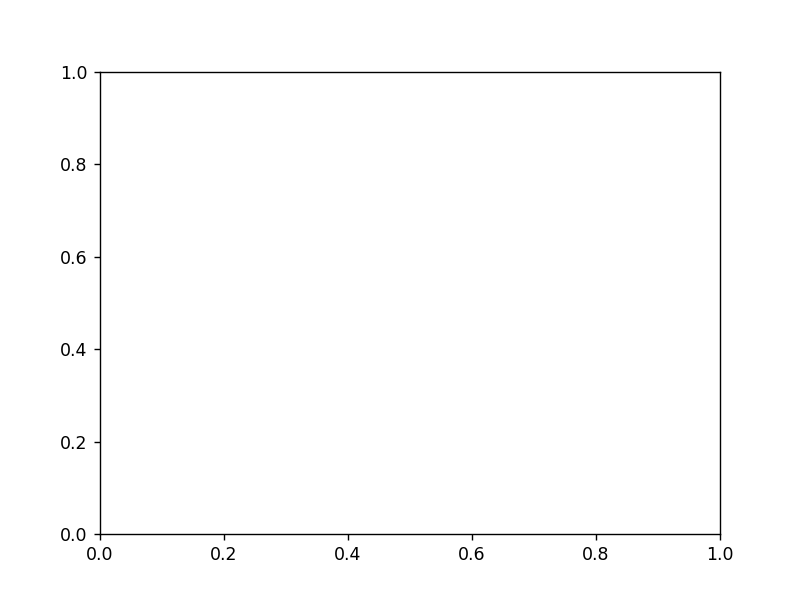

<IPython.core.display.Javascript object>


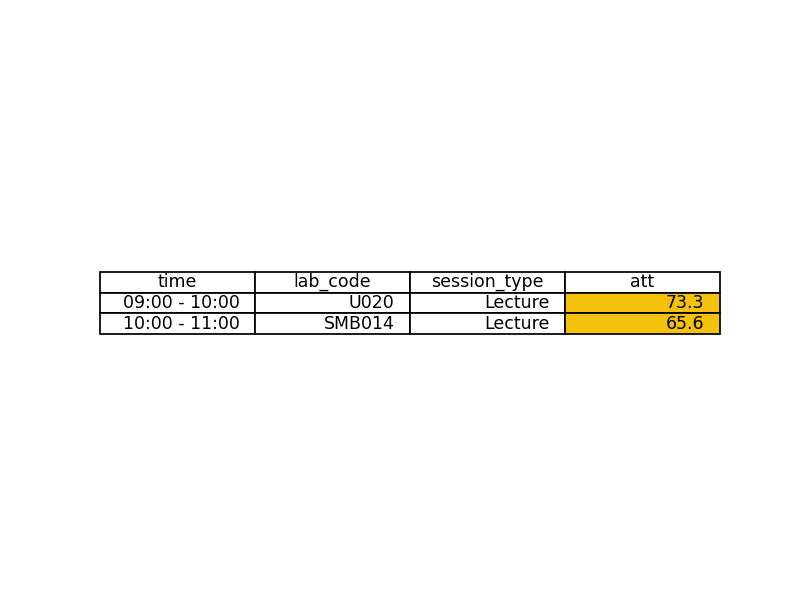

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

# from CW_Preprocessing import *
import ipynb
from ipynb.fs.defs.CW_Preprocessing import *
from ipywidgets import widgets, Label
from IPython import get_ipython


def get_module_att_fig(module_name, week_list):

    att_df = ModuleRecord(module_name).wide_to_long()
    att_df = att_df[att_df.week.isin(week_list)]

    gb_att_df = att_df.groupby(["time", "lab_code", "session_type"], as_index=False)
    module_att_table = gb_att_df.agg({"att": "mean"})
    module_att_table["att"] = (module_att_table["att"]*100).round(1)

    cellcolors = []
    for row in range(module_att_table.shape[0]):
        row_colors = []
        for col in range(module_att_table.shape[1]):
            if col ==3:
                if module_att_table.iloc[row, col] <= 25:
                    row_colors.append("#DB3236")
                elif 25 < module_att_table.iloc[row, col] <= 75:
                    row_colors.append("#F4C20D")
                elif 75 < module_att_table.iloc[row, col] <= 100:
                    row_colors.append("#3CBA54")
                else:
                    row_colors.append("#FFFFFF")
            else:
                row_colors.append("#FFFFFF")
        cellcolors.append(row_colors)

    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=module_att_table.values, cellColours=cellcolors, colLabels=module_att_table.columns, loc='center')

    return fig


def main_py():
    """
    this will be execute
    """
    module = input("Please Enter Module")
    week = input("Please Enter Week")
    get_module_att_fig(module, [week])
    plt.show(block=False)


def main_ipynb():
    plt.cla()
    module = module_dd.value
    week = week_dd.value
    get_module_att_fig(module, [week])
    plt.show(block=False)


if __name__ == "__main__":
    shell = get_ipython()
    if type(shell).__name__ == 'ZMQInteractiveShell':
#         ipython = get_ipython()
#         ipython.run_line_magic("matplotlib", "qt")
        matplotlib.use("nbagg")
        module_list = get_modules_list()
        module_dd = widgets.Dropdown(options=module_list)
        module_label = Label(value='Module:')
        display(module_label, module_dd)

        week_list = ModuleRecord(module_dd.value).week_list()
        week_dd = widgets.Dropdown(options=week_list)
        week_label = Label(value='Week:')
        display(week_label, week_dd)

        def update_week_dd(*args):
            week_list = ModuleRecord(module_dd.value).week_list()
            week_dd.options = week_list


        module_dd.observe(update_week_dd, 'value')

        def on_select_week_dd(change):
            if module_dd.value is not None and change.new is not None:
                main_ipynb()

        week_dd.observe(on_select_week_dd, 'value')

    else:
        main_py()